In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2 as cv

torch.Size([100])
epoch: 10, loss = 4332.6274
epoch: 20, loss = 3232.5481
epoch: 30, loss = 2436.9421
epoch: 40, loss = 1860.9064
epoch: 50, loss = 1443.4197
epoch: 60, loss = 1140.5563
epoch: 70, loss = 920.6545
epoch: 80, loss = 760.8608
epoch: 90, loss = 644.6594
epoch: 100, loss = 560.1006


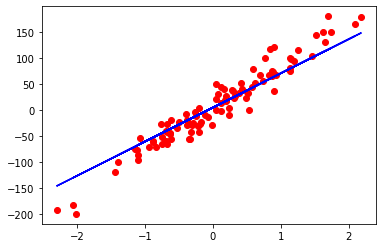

In [17]:
# Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100
for epoch in range(num_epochs) :
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
        
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [24]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class LogisticRegression(nn.Module) :
    
    def __init__(self, n_input_features) :
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x) :
        y_predicted = torch.sigmoid(self.linear(x))
        
model = LogisticRegression(n_features)

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(criterion)
num_epochs = 100
for epoch in range(num_epochs) :
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad() :
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.ea(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

BCELoss()


AttributeError: 'NoneType' object has no attribute 'size'